# Data Preprocessing 

## - Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## - Import Cleaned Dataset

In [4]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## - Train Test Split

In [6]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [7]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [8]:
X = df.drop('FWI',axis=1)
y= df['FWI']

In [9]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [10]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.204068,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.150118,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.090066,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.607844,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.272161,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.086620,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.094095,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.113483,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.090411,0.079373
Classes,0.204068,-0.150118,-0.090066,-0.607844,0.272161,0.086620,0.094095,0.113483,0.090411,1.000000,0.103117


## - Checking multicollinearlity and remove highly corrrelated features

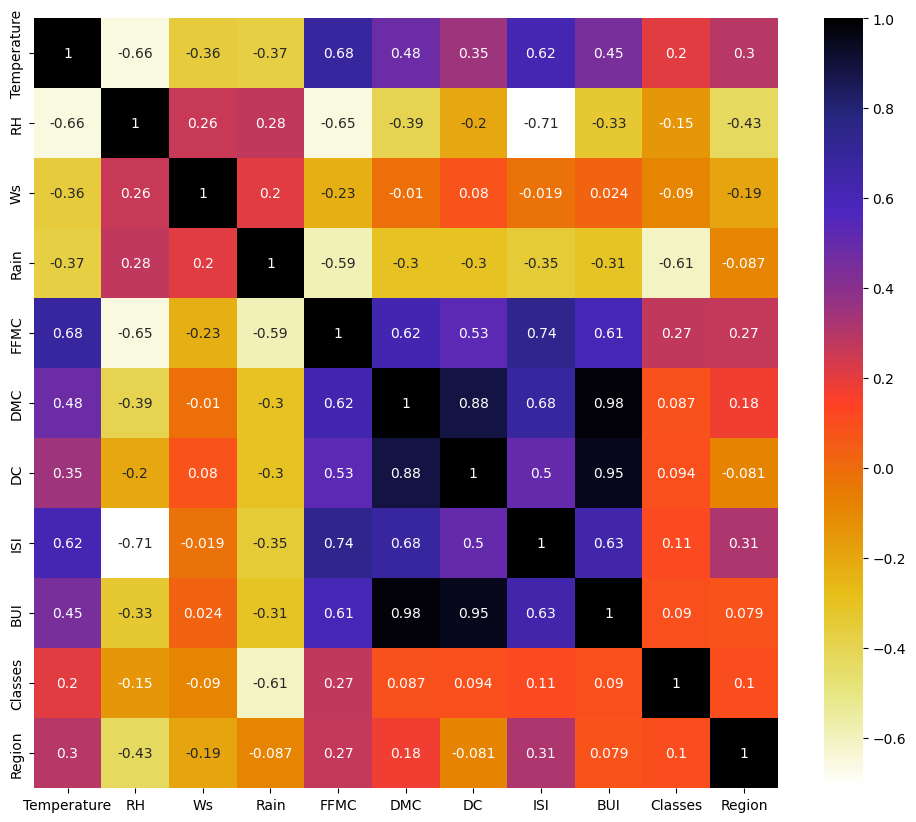

In [11]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
# setting threshold value 75%
corr_features = correlation(X_train, 0.75)

In [14]:
# features which has correlation more than 0.75
corr_features

{'BUI', 'DC'}

In [15]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

## - Feature scaling Applying Standardization

In [16]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [17]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## - Box plot the dataset to understand effect of standard scaler

C:\Users\Paulami Maitra\AppData\Local\Temp\ipykernel_18748\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

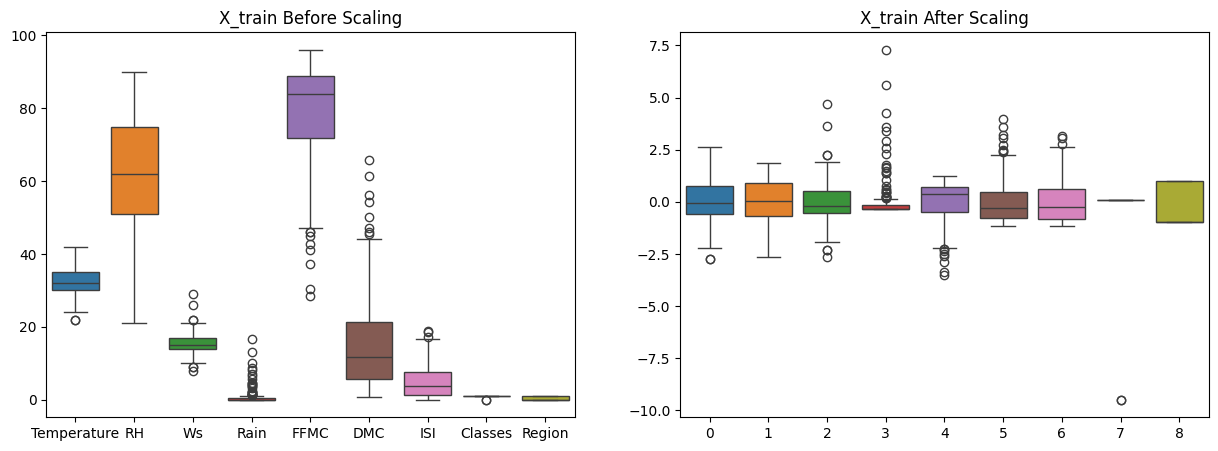

In [18]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**0=Temperature, 1 = RH, 2 = Ws, 3 = Rain, 4 = FFMC,5 = DMC, 6 = ISI,7 = Region**

## - Model Selection For Regression 
* For model selection process multiple models are tested 
* Choose some and fine tune and Finalize one model

## - Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print("Linear Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Linear Regression
R2 Score value: 0.9700
MAE value: 0.6510


## - Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)


print("Lasso Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Lasso Regression
R2 Score value: 0.9377
MAE value: 1.1209


## - Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.9690
MAE value: 0.6689


## - ElasticNet Regression

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
elastic_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, elastic_pred)
r2 = r2_score(y_test, elastic_pred)


print("Elastic Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Elastic Regression
R2 Score value: 0.8600
MAE value: 1.8051


## - Support Vector Regressor

In [23]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)


print("Support Vector Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Support Vector Regressor
R2 Score value: 0.9412
MAE value: 0.8256


## - Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9811
MAE value: 0.5595


## - K-Neighbors Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = mean_absolute_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)


print("K_Neighbours Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

K_Neighbours Regressor
R2 Score value: 0.9422
MAE value: 0.9816


In [26]:
'''from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
rf = RandomForestRegressor()
xgb_model = xgb.XGBRegressor()

# Train models
rf.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

# Ensemble predictions (simple averaging)
ensemble_pred = (rf_pred + xgb_pred) / 2

# Evaluate ensemble
mae = mean_absolute_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print("Ensemble of XGBoost and Random Forest")
print("R2 Score value: {:.4f}".format(r2))
print("MAE value: {:.4f}".format(mae))'''


Ensemble of XGBoost and Random Forest
R2 Score value: 0.9829
MAE value: 0.5456


In [27]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
rf = RandomForestRegressor()
xgb_model = xgb.XGBRegressor()

# Train models
rf.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

# Ensemble predictions (simple averaging)
ensemble_pred = (rf_pred + xgb_pred) / 2

# Evaluate ensemble
mae = mean_absolute_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print("Ensemble of XGBoost and Random Forest")
print("R2 Score value: {:.4f}".format(r2))
print("MAE value: {:.4f}".format(mae))


Ensemble of XGBoost and Random Forest
R2 Score value: 0.9840
MAE value: 0.5270


## XG Boost

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print("XGBoost Regressor")
print("R2 Score value: {:.4f}".format(r2))
print("MAE value: {:.4f}".format(mae))


XGBoost Regressor
R2 Score value: 0.9803
MAE value: 0.5421


## Ada Boost

In [30]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ada_pred)
r2 = r2_score(y_test, ada_pred)

print("AdaBoost Regressor")
print("R2 Score value: {:.4f}".format(r2))
print("MAE value: {:.4f}".format(mae))


AdaBoost Regressor
R2 Score value: 0.9490
MAE value: 1.1660


## Boosting Algorithm


In [35]:
# Initialize the models
models = {
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror'),
    "RandomForest": RandomForestRegressor(n_estimators=50, random_state=42)
}

# Train each model and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate R2 Score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print results
    print(f"\n{model_name} Results:")
    print("R2 Score value: {:.4f}".format(r2))
    print("MAE value: {:.4f}".format(mae))


AdaBoost Results:
R2 Score value: 0.9535
MAE value: 1.1178

XGBoost Results:
R2 Score value: 0.9803
MAE value: 0.5423

RandomForest Results:
R2 Score value: 0.9799
MAE value: 0.5954


In [45]:
# Initialize base models
base_models = [
    ("AdaBoost", AdaBoostRegressor(n_estimators=50, random_state=42)),
    # ("XGBoost", XGBRegressor(n_estimators=50, random_state=42, objective='reg:squarederror')),
    # ("RandomForest", RandomForestRegressor(n_estimators=50, random_state=42)),
    ("KNN", KNeighborsRegressor(n_neighbors=5))
]

# Train base models and gather predictions for stacking
train_meta_features = np.zeros((X_train.shape[0], len(base_models)))
test_meta_features = np.zeros((X_test.shape[0], len(base_models)))

for i, (model_name, model) in enumerate(base_models):
    # Fit each base model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Generate predictions
    train_meta_features[:, i] = model.predict(X_train_scaled)
    test_meta_features[:, i] = model.predict(X_test_scaled)

# Train meta-model on predictions from base models
meta_model = LinearRegression()
meta_model.fit(train_meta_features, y_train)

# Meta-model prediction
y_pred = meta_model.predict(test_meta_features)

# Evaluate hybrid model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print("Stacking Hybrid Model Results:")
print("R2 Score value: {:.4f}".format(r2))
print("MAE value: {:.4f}".format(mae))

Stacking Hybrid Model Results:
R2 Score value: 0.9814
MAE value: 0.5708


### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Hybrid Model(KNN+Ada Boost)     | 98.14 % |
| XG Boost     | 98.03 % |
| Random Forest Regressor     | 97.75 % |
| Linear Regression  | 97.00 % |
| Ridge Regression  | 96.96 % |
| Ada Boost    | 95.35 % |
| K Neighbors Regressor  | 94.22 %|
| Lasso Regression  | 93.77 % |
| Support Vector Regressor     | 94.12 % |
| Elastic Net Regressor | 86.00 % |

The hybrid model has performed best out of all models.

## - Hyperparameter Tuning

### Tuning Random Forest Regressor

In [60]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


c:\Data Science Projects(2024)\Algerian Forest Fire\venvv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Data Science Projects(2024)\Algerian Forest Fire\venvv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Data Science Projects(2024)\Algerian Forest Fire\venvv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Data Science Projects(2024)\Algerian Forest Fire\venvv\lib\site-packages\sk

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [61]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9694
MAE value: 0.7438


#### Feature removal

For the web app, I will use the 5 most important features that are helpful in predicting the fire since we it would be pain to front end user to fill all 8 features on the web app. I will drop the rest of features so we can build an interactive and user friendly web app.

In [62]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,3.586098e-01
4,FFMC,3.177801e-01
5,DMC,1.908916e-01
3,Rain,5.295396e-02
0,Temperature,3.659964e-02
1,RH,3.033954e-02
2,Ws,1.105896e-02
8,Region,1.766381e-03
7,Classes,4.133490e-08


Text(0, 0.5, 'Features')

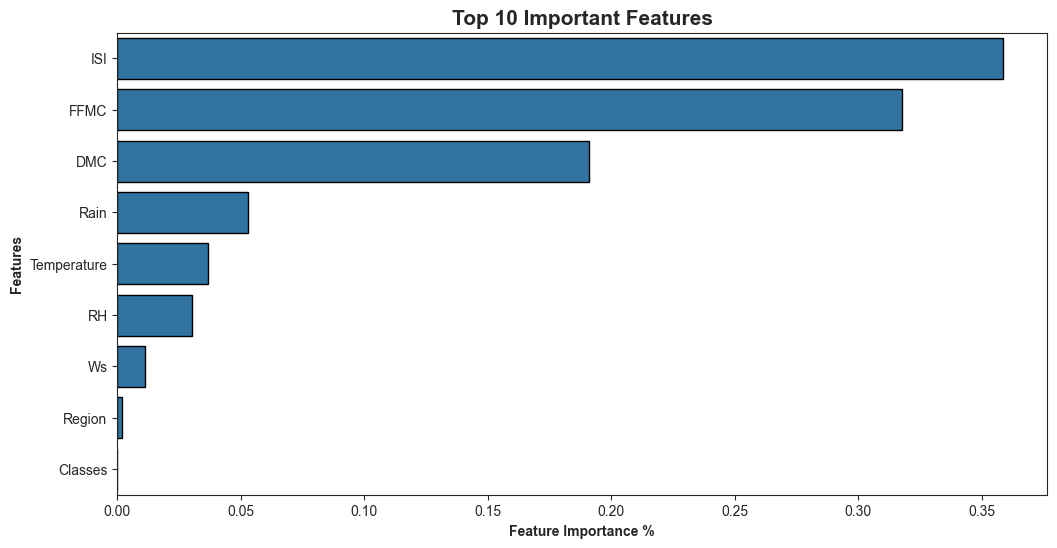

In [63]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

### Model for deployment

In [64]:
X_train_new = X_train.drop(['Classes', 'Region', 'Ws', 'RH'], axis=1)
X_test_new = X_test.drop(['Classes', 'Region', 'Ws', 'RH'], axis=1)

In [65]:
X_train_new.columns

Index(['Temperature', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [66]:
scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)


In [67]:
best_random_grid.fit(X_train_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(X_test_new_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9726
MAE value: 0.6390


In [68]:
import pickle
pickle.dump(scaler_new,open('scaler.pkl','wb'))
pickle.dump(best_random_grid,open('regressor.pkl','wb'))